In [15]:
import glob # For getting file names
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
# import seaborn as sns
# import torch

from collections import Counter
# from gap_statistic import OptimalK
from scipy import stats, cluster
from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer

from utils.clustering_utils import *
from utils.conformal_utils import *
from utils.experiment_utils import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Run for CIFAR-100

In [11]:
# # Enron - BERT (n_train=500)
# softmax_path = "../class-conditional-conformal-datasets/notebooks/.cache/email_softmax_bert_ntrain=500.npy"
# labels_path = "../class-conditional-conformal-datasets/notebooks/.cache/email_labels_bert_ntrain=500.npy"
# save_folder = '.cache/paper/enron'

# # ImageNet
# softmax_path = '/home/tding/data/finetuned_imagenet/imagenet_train_subset_softmax.npy'
# labels_path = '/home/tding/data/finetuned_imagenet/imagenet_train_subset_labels.npy'
# save_folder = '.cache/paper/imagenet'

# CIFAR-100
softmax_path = "../class-conditional-conformal-datasets/notebooks/.cache/best-cifar100-model-valsoftmax_frac=0.3.npy"
labels_path = "../class-conditional-conformal-datasets/notebooks/.cache/best-cifar100-model-vallabels_frac=0.3.npy"
save_folder = '.cache/paper/cifar100'
 
# SETTINGS
alpha = .1
n_totalcal_list = [10, 30]
score_function_list = ['softmax', 'APS', 'RAPS']
seeds = [0,1,2,3,4,5,6,7,8,9]

In [12]:
%%time

softmax_scores = np.load(softmax_path)
labels = np.load(labels_path)

run_experiment(softmax_scores, labels,
                  save_folder,
                  alpha=alpha,
                  n_totalcal_list=n_totalcal_list,
                  score_function_list = score_function_list,
                  seeds=seeds)

====== score_function=softmax ======
Computing conformal score...

seed=0
Heuristic chose n_clustering=5, num_clusters=2
Cluster sizes: [62, 38]
Heuristic chose n_clustering=5, num_clusters=2
p=0.0 for one cluster null hypothesis, so running Clustered Conformal
Cluster sizes: [62, 38]
Saved results to .cache/paper/cifar100/n_totalcal=10/score=softmax/seed=0_allresults.pkl

seed=1
Heuristic chose n_clustering=5, num_clusters=2
Cluster sizes: [59, 41]
Heuristic chose n_clustering=5, num_clusters=2
p=0.02 for one cluster null hypothesis, so running Standard Conformal
Saved results to .cache/paper/cifar100/n_totalcal=10/score=softmax/seed=1_allresults.pkl

seed=2
Heuristic chose n_clustering=5, num_clusters=2
Cluster sizes: [54, 46]
Heuristic chose n_clustering=5, num_clusters=2
p=0.07 for one cluster null hypothesis, so running Standard Conformal
Saved results to .cache/paper/cifar100/n_totalcal=10/score=softmax/seed=2_allresults.pkl

seed=3
Heuristic chose n_clustering=5, num_clusters=2


Heuristic chose n_clustering=5, num_clusters=2
Cluster sizes: [62, 38]
Heuristic chose n_clustering=5, num_clusters=2
p=0.11 for one cluster null hypothesis, so running Standard Conformal
Saved results to .cache/paper/cifar100/n_totalcal=10/score=RAPS/seed=8_allresults.pkl

seed=9
Heuristic chose n_clustering=5, num_clusters=2
Cluster sizes: [67, 33]
Heuristic chose n_clustering=5, num_clusters=2
p=0.4 for one cluster null hypothesis, so running Standard Conformal
Saved results to .cache/paper/cifar100/n_totalcal=10/score=RAPS/seed=9_allresults.pkl
====== score_function=softmax ======
Computing conformal score...

seed=0
Heuristic chose n_clustering=17, num_clusters=8
Cluster sizes: [30, 13, 12, 12, 12, 10, 6, 5]
Heuristic chose n_clustering=17, num_clusters=8
p=0.03 for one cluster null hypothesis, so running Standard Conformal
Saved results to .cache/paper/cifar100/n_totalcal=30/score=softmax/seed=0_allresults.pkl

seed=1
Heuristic chose n_clustering=17, num_clusters=8
Cluster sizes:

Heuristic chose n_clustering=17, num_clusters=8
p=0.61 for one cluster null hypothesis, so running Standard Conformal
Saved results to .cache/paper/cifar100/n_totalcal=30/score=RAPS/seed=3_allresults.pkl

seed=4
Heuristic chose n_clustering=17, num_clusters=8
Cluster sizes: [24, 21, 15, 11, 10, 9, 8, 2]
Heuristic chose n_clustering=17, num_clusters=8
p=0.12 for one cluster null hypothesis, so running Standard Conformal
Saved results to .cache/paper/cifar100/n_totalcal=30/score=RAPS/seed=4_allresults.pkl

seed=5
Heuristic chose n_clustering=17, num_clusters=8
Cluster sizes: [28, 17, 14, 14, 11, 6, 5, 5]
Heuristic chose n_clustering=17, num_clusters=8
p=0.06 for one cluster null hypothesis, so running Standard Conformal
Saved results to .cache/paper/cifar100/n_totalcal=30/score=RAPS/seed=5_allresults.pkl

seed=6
Heuristic chose n_clustering=17, num_clusters=8
Cluster sizes: [22, 19, 19, 16, 8, 8, 4, 4]
Heuristic chose n_clustering=17, num_clusters=8
p=0.11 for one cluster null hypothesis

In [13]:
for n_totalcal in n_totalcal_list:
    for score in score_function_list:
        print(f'===== n_totalcal={n_totalcal}, score={score} =====')
        folder = f'{save_folder}/n_totalcal={n_totalcal}/score={score}/'
        average_results_across_seeds(folder)

===== n_totalcal=10, score=softmax =====
Number of seeds found: 10
Avg class coverage gap for each random seed:
  standard: [4.04928094 3.975753   4.06592026 4.50717269 3.92955592 4.186032
 4.23210642 4.90446876 4.65600384 4.33677395]
  classwise: [8.07112284 7.13220062 6.59986122 6.56036531 6.53980779 6.65810851
 8.00864273 6.43935591 6.57790642 6.0097474 ]
  smart_cluster: [3.75282051 3.975753   4.06592026 4.50717269 3.73928167 4.186032
 4.23210642 4.90446876 4.65600384 4.33677395]
  always_cluster: [3.75282051 3.78908453 4.02357786 4.53812468 3.73928167 3.80625194
 3.90703719 4.24067394 3.81264376 4.07412036]


,method,class_cov_gap_mean,class_cov_gap_se,max_class_cov_gap_mean,max_class_cov_gap_se,avg_set_size_mean,avg_set_size_se
0,standard,4.284307,0.301919,14.230769,1.785691,6.338718,0.832415
1,classwise,6.859712,0.643465,33.470833,5.428314,18.866747,2.883627
2,smart_cluster,4.235633,0.358650,14.008441,2.034948,6.556671,1.108709
3,always_cluster,3.968362,0.244618,13.853304,2.492463,6.983841,1.063310


===== n_totalcal=10, score=APS =====
Number of seeds found: 10
Avg class coverage gap for each random seed:
  standard: [3.76710587 4.03257274 4.0677994  4.39578021 4.12730484 4.02767635
 4.34929362 4.38085964 4.53614878 4.59453616]
  classwise: [7.4760042  7.26178356 5.89099638 6.87090514 6.89193791 6.00091603
 7.19906212 6.29679848 6.66213699 6.67874437]
  smart_cluster: [3.39551324 4.03257274 4.0677994  4.39578021 4.12730484 4.02767635
 4.34929362 4.38085964 4.53614878 4.59453616]
  always_cluster: [3.39551324 3.71043622 3.76409306 4.63904756 3.83616608 3.80457392
 4.59057366 3.84725685 4.13527249 3.96622175]


,method,class_cov_gap_mean,class_cov_gap_se,max_class_cov_gap_mean,max_class_cov_gap_se,avg_set_size_mean,avg_set_size_se
0,standard,4.227908,0.249416,14.199584,2.215040,8.861559,1.252065
1,classwise,6.722929,0.503518,34.064996,8.357704,21.452447,2.614896
2,smart_cluster,4.190748,0.329972,14.166667,2.294299,8.733235,0.976079
3,always_cluster,3.968915,0.368809,13.160125,3.172917,9.245988,1.282525


===== n_totalcal=10, score=RAPS =====
Number of seeds found: 10
Avg class coverage gap for each random seed:
  standard: [4.68443928 4.75252509 4.77534326 5.49443983 4.79998393 4.79566448
 5.2857518  4.80127944 5.49791416 5.02516304]
  classwise: [7.41665377 7.48285685 6.39546568 6.56816855 6.47741251 6.12484931
 6.48712313 6.43711333 6.76523953 6.63746665]
  smart_cluster: [4.55241507 4.75252509 4.77534326 5.49443983 4.79998393 4.79566448
 5.2857518  4.80127944 5.49791416 5.02516304]
  always_cluster: [4.55241507 4.68810722 4.50138729 5.21907306 4.16402567 4.43383008
 5.38666852 4.33186201 5.38302248 5.14872769]


,method,class_cov_gap_mean,class_cov_gap_se,max_class_cov_gap_mean,max_class_cov_gap_se,avg_set_size_mean,avg_set_size_se
0,standard,4.991250,0.301074,14.607167,2.573210,6.362659,1.105681
1,classwise,6.679235,0.416558,34.103260,7.743860,16.824606,1.735860
2,smart_cluster,4.978048,0.316726,14.632377,2.540503,6.357759,1.100128
3,always_cluster,4.780912,0.435703,15.253922,2.953200,6.796735,1.375607


===== n_totalcal=30, score=softmax =====
Number of seeds found: 10
Avg class coverage gap for each random seed:
  standard: [4.15912477 4.13407647 4.0904398  4.65323502 4.04727241 3.95927077
 4.03484885 4.52330209 4.5734541  3.90099757]
  classwise: [4.21575567 4.40299667 4.86350491 5.38431014 3.93398886 4.90107934
 4.71185911 4.28619984 4.06192249 4.80831501]
  smart_cluster: [4.15912477 3.71767024 4.0904398  4.65323502 3.50053199 3.86057945
 3.98766127 3.43053881 4.5734541  3.72569612]
  always_cluster: [3.09270034 3.71767024 3.48397774 4.07255324 3.50053199 3.86057945
 3.98766127 3.43053881 3.65217932 3.72569612]


,method,class_cov_gap_mean,class_cov_gap_se,max_class_cov_gap_mean,max_class_cov_gap_se,avg_set_size_mean,avg_set_size_se
0,standard,4.207602,0.257839,14.926471,1.558060,6.335900,0.478837
1,classwise,4.556993,0.427862,18.650345,4.593009,10.838900,1.066245
2,smart_cluster,3.969893,0.390935,13.943768,2.634280,7.227607,1.323724
3,always_cluster,3.652409,0.274921,12.808474,2.549718,7.978147,0.920732


===== n_totalcal=30, score=APS =====
Number of seeds found: 10
Avg class coverage gap for each random seed:
  standard: [4.1703334  4.10396431 4.32747197 4.62886246 4.22916603 3.97246486
 4.11786548 4.15898799 4.54844449 4.24376247]
  classwise: [4.14399804 4.5940954  4.68148962 5.28195875 3.85088216 4.73690421
 4.76246911 4.4105729  4.50156326 5.08338321]
  smart_cluster: [4.1703334  4.10396431 3.64227269 4.62886246 4.22916603 3.97246486
 4.11786548 4.15898799 4.54844449 4.24376247]
  always_cluster: [3.46065489 4.29058505 3.64227269 3.9894003  3.60139385 3.58002876
 3.76088982 3.74987908 3.70111315 3.81498453]


,method,class_cov_gap_mean,class_cov_gap_se,max_class_cov_gap_mean,max_class_cov_gap_se,avg_set_size_mean,avg_set_size_se
0,standard,4.250132,0.192230,13.797639,1.026717,9.321367,0.850918
1,classwise,4.604732,0.395601,19.305653,4.194234,13.995807,1.152953
2,smart_cluster,4.181612,0.261932,13.457621,1.666459,9.465127,0.989193
3,always_cluster,3.759120,0.223996,14.747557,5.012981,10.558613,1.054754


===== n_totalcal=30, score=RAPS =====
Number of seeds found: 10
Avg class coverage gap for each random seed:
  standard: [4.99874735 4.9092785  4.76437788 5.28335668 5.04017488 4.72116076
 4.93896904 5.03152534 5.27033763 4.68298904]
  classwise: [4.46702579 4.89197041 4.56223319 5.02777545 4.22023313 4.693058
 4.18388445 4.13096473 4.41149135 4.84325268]
  smart_cluster: [4.99874735 4.9092785  4.76437788 5.28335668 5.04017488 4.72116076
 4.93896904 5.03152534 5.27033763 4.68298904]
  always_cluster: [4.09648952 4.59414748 3.83225711 4.61529042 4.1188311  4.23724704
 4.38925562 4.46019174 3.92774196 4.04997743]


,method,class_cov_gap_mean,class_cov_gap_se,max_class_cov_gap_mean,max_class_cov_gap_se,avg_set_size_mean,avg_set_size_se
0,standard,4.964092,0.197182,15.550935,2.089336,6.499687,0.686454
1,classwise,4.543189,0.299301,20.177382,3.705926,11.715213,1.064243
2,smart_cluster,4.964092,0.197182,15.550935,2.089336,6.499687,0.686454
3,always_cluster,4.232143,0.259145,18.613619,5.062369,7.607387,0.885390


Number of seeds found: 10


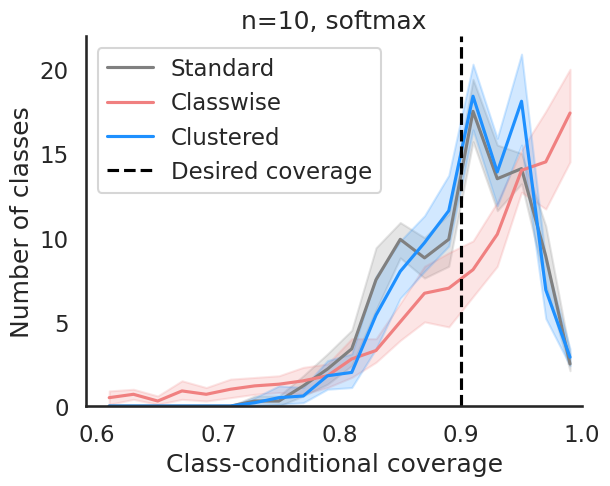

Number of seeds found: 10


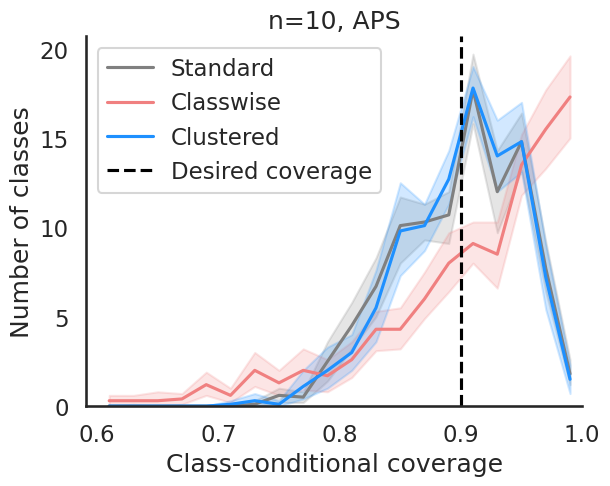

Number of seeds found: 10


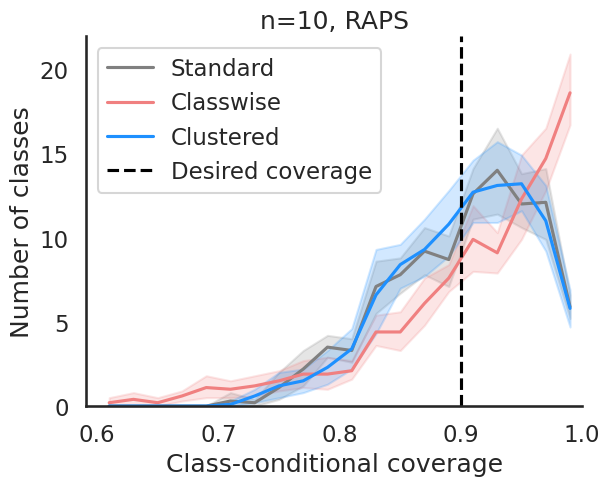

Number of seeds found: 10


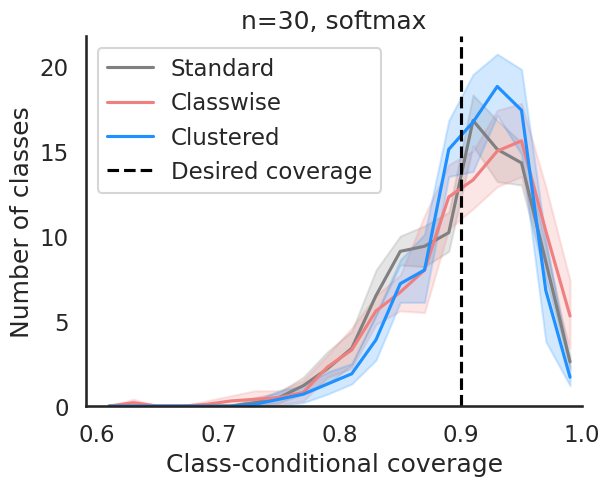

Number of seeds found: 10


In [ ]:
# Plot histograms of class coverage

for n_totalcal in n_totalcal_list:
    for score in score_function_list:
        folder = f'{save_folder}/n_totalcal={n_totalcal}/score={score}/'
        plot_class_coverage_histogram(folder, desired_cov=1-alpha, vmin=.6, vmax=1, nbins=20, title=f'n={n_totalcal}, {score}')

# Run for Enron

In [5]:
# # Enron - BERT (n_train=500)
# softmax_path = "../class-conditional-conformal-datasets/notebooks/.cache/email_softmax_bert_ntrain=500.npy"
# labels_path = "../class-conditional-conformal-datasets/notebooks/.cache/email_labels_bert_ntrain=500.npy"
# save_folder = '.cache/paper/enron'

# # # ImageNet
# # softmax_path = '/home/tding/data/finetuned_imagenet/imagenet_train_subset_softmax.npy'
# # labels_path = '/home/tding/data/finetuned_imagenet/imagenet_train_subset_labels.npy'
# # save_folder = '.cache/paper/imagenet'

# # # CIFAR-100
# # softmax_path = "../class-conditional-conformal-datasets/notebooks/.cache/best-cifar100-model-valsoftmax_frac=0.3.npy"
# # labels_path = "../class-conditional-conformal-datasets/notebooks/.cache/best-cifar100-model-vallabels_frac=0.3.npy"
# # save_folder = '.cache/paper/cifar100'
 
# # SETTINGS
# alpha = .1
# n_totalcal_list = [10, 30]
# score_function_list = ['softmax', 'APS']

In [6]:
# %%time

# softmax_scores = np.load(softmax_path)
# labels = np.load(labels_path)

# run_experiment(softmax_scores, labels,
#                   save_folder,
#                   alpha=alpha,
#                   n_totalcal_list=n_totalcal_list,
#                   score_function_list = score_function_list,
#                   seeds=seeds)

====== score_function=softmax ======
Computing conformal score...

seed=0
Heuristic chose n_clustering=5, num_clusters=2
Cluster sizes: [94, 15]
Heuristic chose n_clustering=5, num_clusters=2
Heuristic chose n_clustering=5, num_clusters=2
Cluster sizes: [99, 10]
Heuristic chose n_clustering=5, num_clusters=2
p=0.01 for one cluster null hypothesis, so running Standard Conformal
Saved results to .cache/paper/enron/n_totalcal=10/score=softmax/seed=3_allresults.pkl

seed=4
Heuristic chose n_clustering=5, num_clusters=2
Cluster sizes: [98, 11]
Heuristic chose n_clustering=5, num_clusters=2
p=0.01 for one cluster null hypothesis, so running Standard Conformal
Saved results to .cache/paper/enron/n_totalcal=10/score=softmax/seed=4_allresults.pkl

seed=5
Heuristic chose n_clustering=5, num_clusters=2
Cluster sizes: [92, 17]
Heuristic chose n_clustering=5, num_clusters=2
p=0.19 for one cluster null hypothesis, so running Standard Conformal
Saved results to .cache/paper/enron/n_totalcal=10/score=

Heuristic chose n_clustering=17, num_clusters=8
p=0.0 for one cluster null hypothesis, so running Clustered Conformal
Cluster sizes: [47, 37, 13, 4, 2, 2, 2, 2]
Saved results to .cache/paper/enron/n_totalcal=30/score=softmax/seed=8_allresults.pkl

seed=9
Heuristic chose n_clustering=17, num_clusters=8
Cluster sizes: [60, 20, 11, 7, 4, 3, 3, 1]
Heuristic chose n_clustering=17, num_clusters=8
p=0.0 for one cluster null hypothesis, so running Clustered Conformal
Cluster sizes: [60, 20, 11, 7, 4, 3, 3, 1]
Saved results to .cache/paper/enron/n_totalcal=30/score=softmax/seed=9_allresults.pkl
====== score_function=APS ======
Computing conformal score...

seed=0
Heuristic chose n_clustering=17, num_clusters=8
Cluster sizes: [18, 18, 16, 15, 15, 13, 11, 3]
Heuristic chose n_clustering=17, num_clusters=8
p=0.05 for one cluster null hypothesis, so running Standard Conformal
Saved results to .cache/paper/enron/n_totalcal=30/score=APS/seed=0_allresults.pkl

seed=1
Heuristic chose n_clustering=17, n

In [14]:
# for n_totalcal in n_totalcal_list:
#     for score in score_function_list:
#         print(f'===== n_totalcal={n_totalcal}, score={score} =====')
#         folder = f'{save_folder}/n_totalcal={n_totalcal}/score={score}/'
#         average_results_across_seeds(folder)